# Backtesting the Pair Trade strategy
We identified 49 highly correlated, co-integrated pairs of stocks from the SPY 500. In this notebook we build a strategy to trade them and backtest it. 

We start with one pair, then each pair individually and then we combine multiple pairs into one strategy.

In [22]:
import bt
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

We import the data in a pkl file, so we can access the complex structures within the table.

In [23]:
df = pd.read_pickle('pairs_data.pkl')
df

,Pair,Stock 1 Price,Stock 2 Price,Spread,Z-Score
0,"[ADI, HPE]",Date 2020-01-02 00:00:00+00:00 110.377747 2...,Date 2020-01-02 00:00:00+00:00 13.796566 20...,Date 2020-01-02 00:00:00+00:00 0.875006 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
1,"[AEP, ETR]",Date 2020-01-02 00:00:00+00:00 78.744629 2...,Date 2020-01-02 00:00:00+00:00 98.197983 2...,Date 2020-01-02 00:00:00+00:00 -0.247044 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
2,"[AMD, NOW]",Date 2020-01-02 00:00:00+00:00 49.099998 2...,Date 2020-01-02 00:00:00+00:00 291.239990 2...,Date 2020-01-02 00:00:00+00:00 -4.931568 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
3,"[AOS, FAST]",Date 2020-01-02 00:00:00+00:00 43.839252 20...,Date 2020-01-02 00:00:00+00:00 32.767380 20...,Date 2020-01-02 00:00:00+00:00 0.252556 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
4,"[APTV, NKE]",Date 2020-01-02 00:00:00+00:00 96.065666 20...,Date 2020-01-02 00:00:00+00:00 96.980347 20...,Date 2020-01-02 00:00:00+00:00 -0.009521 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
...,...,...,...,...,...
44,"[NTRS, USB]",Date 2020-01-02 00:00:00+00:00 92.382469 20...,Date 2020-01-02 00:00:00+00:00 48.224854 20...,Date 2020-01-02 00:00:00+00:00 0.477987 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
45,"[NVR, RCL]",Date 2020-01-02 00:00:00+00:00 3735.500000 ...,Date 2020-01-02 00:00:00+00:00 133.015717 2...,Date 2020-01-02 00:00:00+00:00 0.964391 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
46,"[PHM, RCL]",Date 2020-01-02 00:00:00+00:00 36.733337 2...,Date 2020-01-02 00:00:00+00:00 133.015717 2...,Date 2020-01-02 00:00:00+00:00 -2.621117 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
47,"[PRU, WFC]",Date 2020-01-02 00:00:00+00:00 74.423004 2...,Date 2020-01-02 00:00:00+00:00 47.324253 20...,Date 2020-01-02 00:00:00+00:00 0.364118 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...


We use only the first pair to test the method

In [24]:
test_df = df.iloc[1]

We calculate the mean and standard deviation of the Z-Score. We plot all the available data too inspect.

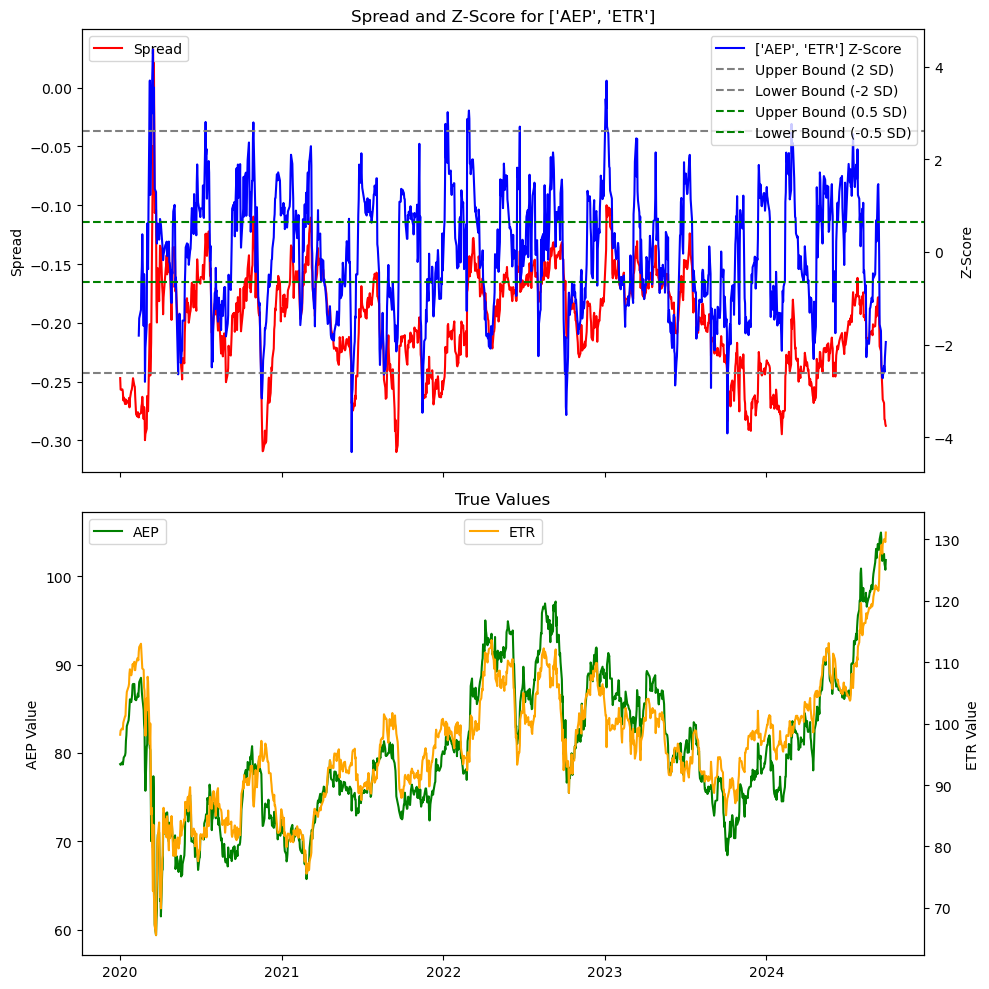

In [25]:
# Get the pair label
pair = test_df['Pair']

# Calculate mean and 2 * std for Z-Score
mean = test_df['Z-Score'].mean()
sd = 2 * test_df['Z-Score'].std()

sd_exit = 0.5 * test_df['Z-Score'].std()

# Create a figure and a set of subplots
fig, (ax1, ax3) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)

# Plot the Spread on the first axis
ax1.plot(test_df['Spread'], color='r', label='Spread')
ax1.set_title(f'Spread and Z-Score for {pair}')
ax1.set_ylabel('Spread')
ax1.legend(loc='upper left')

# Create a secondary y-axis for the Z-Score on ax1
ax2 = ax1.twinx()  
ax2.plot(test_df['Z-Score'], label=f'{pair} Z-Score', color='b')
ax2.axhline(y=sd, color='grey', linestyle='--', label='Upper Bound (2 SD)')
ax2.axhline(y=-sd, color='grey', linestyle='--', label='Lower Bound (-2 SD)')
ax2.axhline(y=sd_exit, color='green', linestyle='--', label='Upper Bound (0.5 SD)')
ax2.axhline(y=-sd_exit, color='green', linestyle='--', label='Lower Bound (-0.5 SD)')
ax2.set_ylabel('Z-Score')
ax2.legend(loc='upper right')

# Configure the second axis for data_true
ax3.plot(test_df['Stock 1 Price'], label=pair[0], color='g')  # Plot the first series
ax4 = ax3.twinx()  # Create a secondary y-axis for the second series
ax4.plot(test_df['Stock 2 Price'], label=pair[1], color='orange')  # Plot the second series
ax3.set_ylabel(f'{pair[0]} Value')
ax4.set_ylabel(f'{pair[1]} Value')
ax3.set_title('True Values')

# Legends for ax3 and ax4
ax3.legend(loc='upper left')
ax4.legend(loc='upper center')


plt.tight_layout()
plt.show()



We see the Z-Score occasionally crosses over the 2 std bands befroe quickly heading back towards the mean. We also see that the prices of the two stocks move together, a testament to the time series analysis we did previously. 

We now define the entry and exit conditions for our strategy. We have two entry situations:

### Option 1: 
If the Z-Score crosses above the upper band (2 std) then stock 2 is underperforming and we expect it to increase, and stock 1 is over performing and we expect it to decrease relative. Therefore we short stock 1 and long stock 2.

### Option 2:
If the Z-Score crosses below the lower band (2 std) then the opposite is true, therfore we long stock 1 and short stock 2.

We also set an exit condition when the Z-Score is between a defined band ( +/- 0.5 std).

In [26]:
stock_1 = test_df['Pair'][0]
stock_2 = test_df['Pair'][1]

# Option 1. Positive Z-Score (> 2std) we long stock 2 and short stock 1
condition_1 = (test_df['Z-Score'] > sd)

signal = test_df['Z-Score'].copy()
signal[:]=np.nan

signal[condition_1] = 1


# Option 2. Negative Z-Score (< -2std) we short stock 2 and long 1
condition_2 = (test_df['Z-Score'] <-sd)

signal[condition_2] = -1


# Exit condition
condition_3 = ((test_df['Z-Score'] > -sd_exit ) & (test_df['Z-Score'] < sd_exit))
               
signal[condition_3] = 0.0
               
# Forward fill the positions through all nan remaning values. 
signal.ffill(inplace= True)

Sort out the Index name so we can backtest

In [27]:
pd.set_option('display.max_rows', 20) 
signal.index = signal.index.date
signal.index.name = 'Date'

We plot the Z-score and the signal to make sure our entry and exit positions are correct.

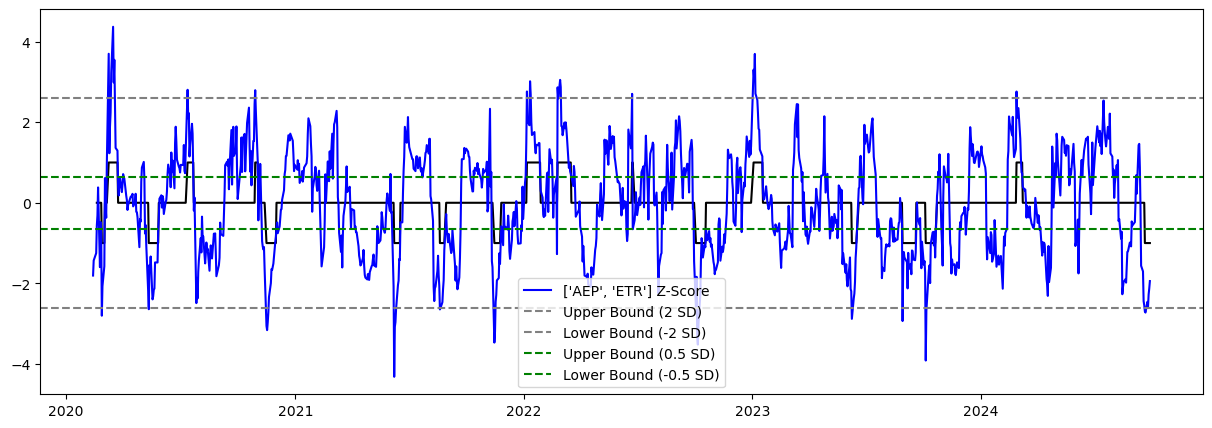

In [28]:
plt.figure(figsize = (15,5))
plt.plot(signal, color = 'black')
plt.plot(test_df['Z-Score'], label=f'{pair} Z-Score', color='b')
plt.axhline(y=sd, color='grey', linestyle='--', label='Upper Bound (2 SD)')
plt.axhline(y=-sd, color='grey', linestyle='--', label='Lower Bound (-2 SD)')
plt.axhline(y=sd_exit, color='green', linestyle='--', label='Upper Bound (0.5 SD)')
plt.axhline(y=-sd_exit, color='green', linestyle='--', label='Lower Bound (-0.5 SD)')
plt.legend()
plt.show()

We see that the blackline depicts the situation we are in. It is equal to 1.0 when the Z-score crosses above the 2std band and remains equal to 1.0 until it scorsses back down below the upper exit band. The opposite is true when Z-Score crosses below the lower band. 

Weight allocation class using the bt.algo (similar to what weve used before)

In [29]:
# Create the Weight allocation class 
class WeighTarget(bt.Algo):
    
    def __init__(self, target_weights):
        self.tw = target_weights  # Initialize only with target_weights
    
    def __call__(self, target):
        # Check if the current date is in the index of target_weights
        if target.now in self.tw.index:
            # Get the target weights for the current date
            w = self.tw.loc[target.now]
            
            # Ensure that w is a Series or dict-like object (mapping tickers to weights)
            if isinstance(w, pd.Series):
                target.temp['weights'] = w.dropna()  # drop any NaN values to avoid errors
            
        return True

Combine the price data of both stocks to use and backtest. 

In [30]:
backtest_data = pd.concat([test_df['Stock 1 Price'],test_df['Stock 2 Price']], axis = 1)
backtest_data.index = backtest_data.index.date
backtest_data.index.name = 'Date'
backtest_data.index = pd.to_datetime(backtest_data.index)
display(backtest_data)

,AEP,ETR
Date,,
2020-01-02,78.744629,98.197983
2020-01-03,78.660393,98.864128
2020-01-06,78.921562,99.213860
2020-01-07,78.938423,99.197197
2020-01-08,78.702499,99.055641
...,...,...
2024-09-23,102.529999,130.029999
2024-09-24,101.410004,130.029999
2024-09-25,101.150002,129.740005


Create the weighting using the signal. 

In [31]:

tw = backtest_data.copy()
tw[:] = 0.0
weight_option_1 = (signal == 1.0)

weight_option_2 = (signal == -1.0)

# Option 1: Short stock 1 and long 2
tw.iloc[:,0][weight_option_1] = -1.0
tw.iloc[:,1][weight_option_1] = 1.0

# Option 2: long 1 and short 2
tw.iloc[:,0][weight_option_2] = 1.0
tw.iloc[:,1][weight_option_2] = -1.0


Our strategy runs daily, selects all the stocks, weights according to our custom class, and rebalances.

We plot our results.

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]


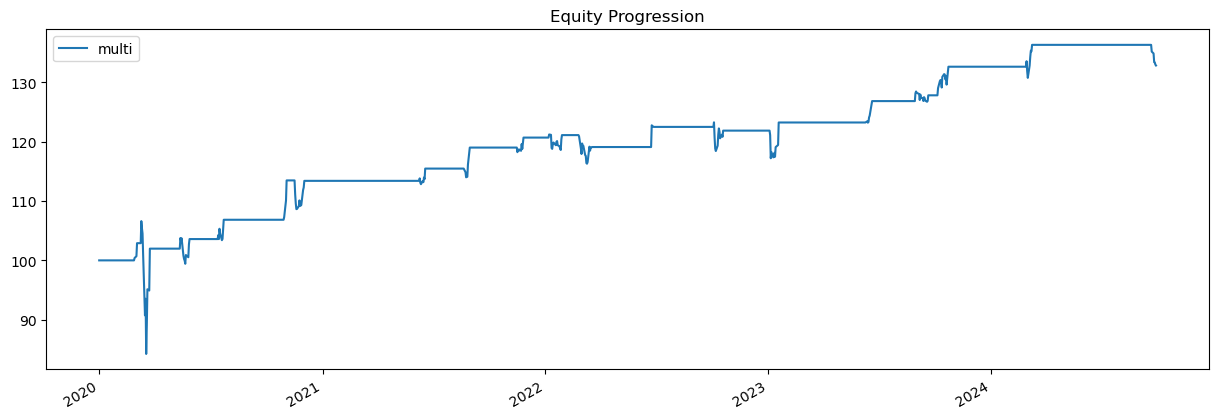

In [32]:


# Produce the Strategy
s = bt.Strategy('multi', [bt.algos.RunDaily(),             # Run Daily
                          bt.algos.SelectAll(),            # Select all stocks
                          WeighTarget(tw),                 # Weight allocation
                          bt.algos.Rebalance()])           # Rebalance


# now we create the Backtest
t = bt.Backtest(s, backtest_data, initial_capital = 10000)

# Run the Backtest
res = bt.run(t)

# Plot the Backtest
res.plot()
plt.show()


In [33]:
res.display()


Stat                 multi
-------------------  ----------
Start                2020-01-01
End                  2024-09-27
Risk-free rate       0.00%

Total Return         32.85%
Daily Sharpe         0.61
Daily Sortino        0.87
CAGR                 6.18%
Max Drawdown         -21.00%
Calmar Ratio         0.29

MTD                  -2.55%
3m                   -2.55%
6m                   -2.55%
YTD                  0.15%
1Y                   3.93%
3Y (ann.)            3.73%
5Y (ann.)            6.18%
10Y (ann.)           -
Since Incep. (ann.)  6.18%

Daily Sharpe         0.61
Daily Sortino        0.87
Daily Mean (ann.)    6.59%
Daily Vol (ann.)     10.83%
Daily Skew           -2.50
Daily Kurt           104.26
Best Day             7.44%
Worst Day            -10.03%

Monthly Sharpe       1.39
Monthly Sortino      4.17
Monthly Mean (ann.)  6.20%
Monthly Vol (ann.)   4.46%
Monthly Skew         1.13
Monthly Kurt         1.72
Best Month           4.26%
Worst Month          -2.55%

Yearly Sha

We see a total return of 33% over the 5 years. We have a yearly sharpe ratio of 0.97 and our drawdown days average 54 with an average drawdown of -2.75%

These stats are good, not amazing but not awful.

# Test of all Pairs individually

We now repeat the process for every pair. The process is exactly the same as before.

We have changed the entry exit criteria to 1.75 std and an exit band of +/- 0.1 std. This means we enter positions earlier and hold for longer until the spread has closed.

In [34]:
df = pd.read_pickle('pairs_data.pkl')
df

,Pair,Stock 1 Price,Stock 2 Price,Spread,Z-Score
0,"[ADI, HPE]",Date 2020-01-02 00:00:00+00:00 110.377747 2...,Date 2020-01-02 00:00:00+00:00 13.796566 20...,Date 2020-01-02 00:00:00+00:00 0.875006 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
1,"[AEP, ETR]",Date 2020-01-02 00:00:00+00:00 78.744629 2...,Date 2020-01-02 00:00:00+00:00 98.197983 2...,Date 2020-01-02 00:00:00+00:00 -0.247044 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
2,"[AMD, NOW]",Date 2020-01-02 00:00:00+00:00 49.099998 2...,Date 2020-01-02 00:00:00+00:00 291.239990 2...,Date 2020-01-02 00:00:00+00:00 -4.931568 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
3,"[AOS, FAST]",Date 2020-01-02 00:00:00+00:00 43.839252 20...,Date 2020-01-02 00:00:00+00:00 32.767380 20...,Date 2020-01-02 00:00:00+00:00 0.252556 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
4,"[APTV, NKE]",Date 2020-01-02 00:00:00+00:00 96.065666 20...,Date 2020-01-02 00:00:00+00:00 96.980347 20...,Date 2020-01-02 00:00:00+00:00 -0.009521 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
...,...,...,...,...,...
44,"[NTRS, USB]",Date 2020-01-02 00:00:00+00:00 92.382469 20...,Date 2020-01-02 00:00:00+00:00 48.224854 20...,Date 2020-01-02 00:00:00+00:00 0.477987 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
45,"[NVR, RCL]",Date 2020-01-02 00:00:00+00:00 3735.500000 ...,Date 2020-01-02 00:00:00+00:00 133.015717 2...,Date 2020-01-02 00:00:00+00:00 0.964391 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
46,"[PHM, RCL]",Date 2020-01-02 00:00:00+00:00 36.733337 2...,Date 2020-01-02 00:00:00+00:00 133.015717 2...,Date 2020-01-02 00:00:00+00:00 -2.621117 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...
47,"[PRU, WFC]",Date 2020-01-02 00:00:00+00:00 74.423004 2...,Date 2020-01-02 00:00:00+00:00 47.324253 20...,Date 2020-01-02 00:00:00+00:00 0.364118 202...,Date 2020-01-02 00:00:00+00:00 NaN 202...


In [35]:

returns = []
for i in range(len(df)):
    test_df = df.iloc[i]
    
    # Calculate mean and 2 * std for Z-Score
    mean = test_df['Z-Score'].mean()
    
    sd = 1.75 * test_df['Z-Score'].std()

    sd_exit = 0.1 * test_df['Z-Score'].std()

    stock_1 = test_df['Pair'][0]
    stock_2 = test_df['Pair'][1]

    # Option 1. Positive Z-Score (> 2std) we long stock 2 and short stock 1

    condition_1 = (test_df['Z-Score'] > sd)

    signal = test_df['Z-Score'].copy()
    signal[:]=np.nan

    signal[condition_1] = 1


    # Option 2. Negative Z-Score (< -2std) we short stock 2 and long 1

    condition_2 = (test_df['Z-Score'] <-sd)

    signal[condition_2] = -1

    condition_3 = ((test_df['Z-Score'] > -sd_exit ) & (test_df['Z-Score'] < sd_exit))

    signal[condition_3] = 0.0

    signal.ffill(inplace= True)
    signal.index = signal.index.date
    signal.index.name = 'Date'
    
    backtest_data = pd.concat([test_df['Stock 1 Price'],test_df['Stock 2 Price']], axis = 1)
    backtest_data.index = backtest_data.index.date
    backtest_data.index.name = 'Date'
    backtest_data.index = pd.to_datetime(backtest_data.index)
    

    tw = backtest_data.copy()
    tw[:] = 0.0
    weight_option_1 = (signal == 1.0)

    weight_option_2 = (signal == -1.0)

    # Option 1: Short stock 1 and long 2
    tw.iloc[:,0][weight_option_1] = -1.0
    tw.iloc[:,1][weight_option_1] = 1.0

    # Option 2: long 1 and short 2
    tw.iloc[:,0][weight_option_2] = 1.0
    tw.iloc[:,1][weight_option_2] = -1.0
    

    # Produce the Strategy
    s = bt.Strategy('multi', [bt.algos.RunDaily(),             # Run Daily
                              bt.algos.SelectAll(),            # Select all stocks
                              WeighTarget(tw),                 # Weight allocation
                              bt.algos.Rebalance()])           # Rebalance


    # now we create the Backtest
    t = bt.Backtest(s, backtest_data, initial_capital = 10000)

    # Run the Backtest
    res = bt.run(t)
    total_return = res.stats.loc['total_return'].values[0] * 100
    avg_drawdown = res.stats.loc['avg_drawdown'].values[0] * 100
    avg_drawdown_days = res.stats.loc['avg_drawdown_days'].values[0]
    sharpe = res.stats.loc['yearly_sharpe'].values[0]
    returns.append([test_df['Pair'],total_return,avg_drawdown,avg_drawdown_days,sharpe])

    
returns_df = pd.DataFrame(returns, columns=['Pairs','Total Returns','Avg. Drawdown','Avg. Drawdown days','Yearly Sharpe Ratio'])


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.42it/s]


In [36]:
pd.set_option('display.max_rows', 49)
display(returns_df)

,Pairs,Total Returns,Avg. Drawdown,Avg. Drawdown days,Yearly Sharpe Ratio
0,"[ADI, HPE]",83.584537,-6.744331,54.370370,0.809126
1,"[AEP, ETR]",48.140778,-2.867820,49.481481,0.609527
2,"[AMD, NOW]",111.790288,-8.551431,75.000000,1.529480
3,"[AOS, FAST]",49.409437,-6.902226,105.857143,0.696750
4,"[APTV, NKE]",47.029348,-10.602363,115.928571,0.459844
5,"[AXON, TT]",114.017387,-9.872367,106.785714,0.787591
6,"[AXP, HIG]",271.449833,-3.705744,25.538462,1.852438
7,"[BAC, PNC]",25.204229,-4.001606,57.000000,0.421714
8,"[BK, MCO]",15.458438,-9.585563,256.833333,0.109692
9,"[BKNG, DHI]",33.639941,-13.582421,128.666667,-0.110095


In [37]:
print('TR',returns_df['Total Returns'].mean())
print('AD',returns_df['Avg. Drawdown'].mean())
print('ADD',returns_df['Avg. Drawdown days'].mean())
print('YSR',returns_df['Yearly Sharpe Ratio'].mean())

TR 68.95760224877571
AD -11.901949556688942
ADD 211.22834116701145
YSR 0.724049801467676


We average the stats of all 49 pairs and find that we have an average total return of 69%, a Sharpe ratio of 0.72

# Test all as 1 strategy 

Here instead of testing each pair individually we calculate the weights for every pair at the same time and test this strategy. We have a number of stocks that appear in more than 1 pair. THis means that its weighting may be more than 1.0, if it sperforming particularly poorly compared to its other pairs it will be entered into more than 1 long position. 

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.79s/it]


Stat                 multi
-------------------  ----------
Start                2020-01-01
End                  2024-09-27
Risk-free rate       0.00%

Total Return         22093.28%
Daily Sharpe         1.49
Daily Sortino        2.82
CAGR                 212.65%
Max Drawdown         -86.18%
Calmar Ratio         2.47

MTD                  11.16%
3m                   98.16%
6m                   91.43%
YTD                  447.19%
1Y                   357.04%
3Y (ann.)            296.40%
5Y (ann.)            212.65%
10Y (ann.)           -
Since Incep. (ann.)  212.65%

Daily Sharpe         1.49
Daily Sortino        2.82
Daily Mean (ann.)    242.53%
Daily Vol (ann.)     162.89%
Daily Skew           1.14
Daily Kurt           9.33
Best Day             74.84%
Worst Day            -54.09%

Monthly Sharpe       1.51
Monthly Sortino      3.94
Monthly Mean (ann.)  198.18%
Monthly Vol (ann.)   131.14%
Monthly Skew         0.48
Monthly Kurt         0.79
Best Month           133.84%
Worst Month      

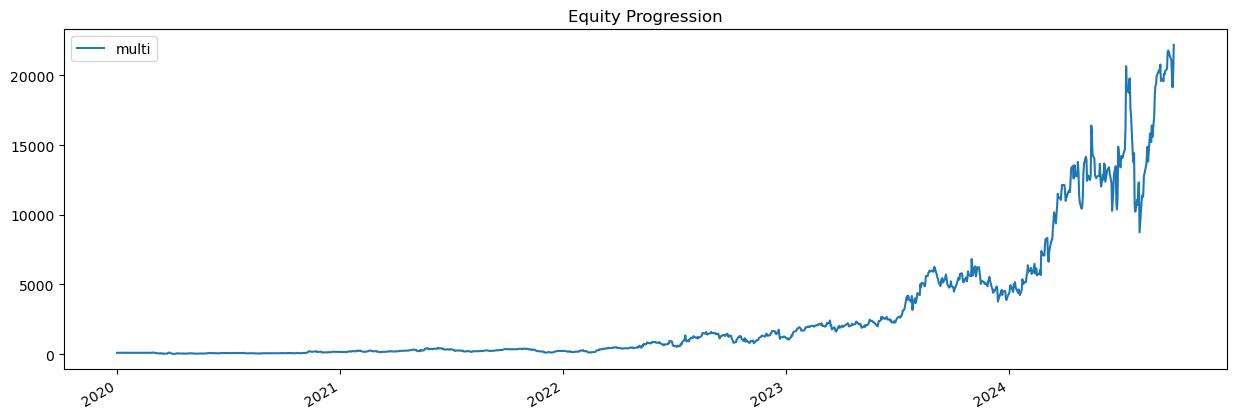

In [56]:
# Initialize an empty list to store backtest results
returns = []

# Initialize an empty df for the combined weights for all stocks
combined_weights = None
combined_prices = None

# Loop through a specified number of the pairs and calculate the signal and weights 
for i in range(0,20):
    test_df = df.iloc[i]
    # Calculate mean and entry and exit criteria
    mean = test_df['Z-Score'].mean()
    sd = 1.75 * test_df['Z-Score'].std()
    sd_exit = 0.1 * test_df['Z-Score'].std()

    stock_1 = test_df['Pair'][0]
    stock_2 = test_df['Pair'][1]

    # Option 1. Positive Z-Score (> 2std) we long stock 2 and short stock 1
    condition_1 = (test_df['Z-Score'] > sd)

    signal = test_df['Z-Score'].copy()
    signal[:] = np.nan

    signal[condition_1] = 1

    # Option 2. Negative Z-Score (< -2std) we short stock 2 and long 1
    condition_2 = (test_df['Z-Score'] < -sd)
    signal[condition_2] = -1

    condition_3 = ((test_df['Z-Score'] > -sd_exit) & (test_df['Z-Score'] < sd_exit))
    signal[condition_3] = 0.0

    signal.ffill(inplace=True)
    signal.index = signal.index.date
    signal.index.name = 'Date'

    # Backtest data with stock prices for the pair
    backtest_data = pd.concat([test_df['Stock 1 Price'], test_df['Stock 2 Price']], axis=1)
    backtest_data.index = backtest_data.index.date
    backtest_data.index.name = 'Date'
    backtest_data.index = pd.to_datetime(backtest_data.index)

    tw = backtest_data.copy()
    tw[:] = 0.0

    weight_option_1 = (signal == 1.0)
    weight_option_2 = (signal == -1.0)

    # Option 1: Short stock 1 and long 2
    tw.iloc[:, 0][weight_option_1] = -1.0
    tw.iloc[:, 1][weight_option_1] = 1.0

    # Option 2: Long stock 1 and short 2
    tw.iloc[:, 0][weight_option_2] = 1.0
    tw.iloc[:, 1][weight_option_2] = -1.0

    # Combine weights: If combined_weights is empty, initialize it
    if combined_weights is None:
        combined_weights = tw
        combined_prices = backtest_data
    else:
        # Add the weights and prices to the combined df
        combined_weights = combined_weights.add(tw, fill_value=0)
        combined_prices = pd.concat([combined_prices, backtest_data], axis=1)

# Get rid of duplicates and arange the the df into the same order
combined_weights = combined_weights.loc[:, ~combined_weights.columns.duplicated()]
combined_prices = combined_prices.loc[:, ~combined_prices.columns.duplicated()]
combined_weights = combined_weights[combined_prices.columns]

# Now we create the strategy using the combined weights for all pairs
s = bt.Strategy('multi', [
    bt.algos.RunDaily(),             # Run Daily
    bt.algos.SelectAll(),            # Select all stocks
    WeighTarget(combined_weights),   # Weight allocation based on combined weights
    bt.algos.Rebalance()             # Rebalance
])

# Create the Backtest
t = bt.Backtest(s, combined_prices)

# Run the Backtest
res = bt.run(t)

# Get the results
total_return = res.stats.loc['total_return'].values[0] * 100
avg_drawdown = res.stats.loc['avg_drawdown'].values[0] * 100
avg_drawdown_days = res.stats.loc['avg_drawdown_days'].values[0]
sharpe = res.stats.loc['yearly_sharpe'].values[0]

# Add results to list
returns.append(['Combined Strategy', total_return, avg_drawdown, avg_drawdown_days, sharpe])

# Display backtest results
res.plot()
res.display()

We find an intersting thing. If we use all 49 pairs our backtesting breaks. I am unsure of why, if its a problem with the package or my logic. However if we use the first 20 of them we get returns of 22,000% which is great and a Sharpe ratio of 1.49 which is good. Similarly if we use 30 to 49 we have a return of 66,000% and a Sharpe ratio of 1.10. Using 20 to 30 gives -86%.

We want to identify if there is a dodgy pair that is significantly impacting the returns. 

We test 20 to 25 and get 1193%.
25 to 30 gives -37%
25 to 27 gave 34%
28 to 30 gives 45%
If we look back at the idividual strategys 29 has a bad returna and if we plot only this strategy we find that it drops to 10% equity very quicly. So it appears to be a poor position to take with bad returns but a valid position and not something we should throw out as to avoid data snooping bias. 

Using all 49 might be overkill and be we might be incresing the complexity of the portfolio, resulting in negative outcomes. Our selction of the pairs might not be harsh enough and our inclusion of some poor choices might be diluting the portfolio. 